In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [2]:
a = np.array([1,2,5,6,6])
b = np.array([1,3,7,5,7])

In [3]:
point = ['P1','P2','P3','P4','P5']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

,a,b
Point,,
P1,1,1
P2,2,3
P3,5,7
P4,6,5
P5,6,7


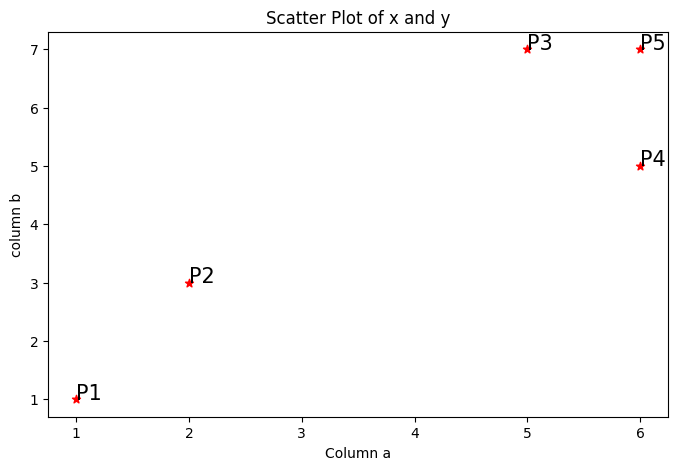

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

In [5]:
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist=dist*dist
dist

,P1,P2,P3,P4,P5
P1,0.0,5.0,52.0,41.0,61.0
P2,5.0,0.0,25.0,20.0,32.0
P3,52.0,25.0,0.0,5.0,1.0
P4,41.0,20.0,5.0,0.0,4.0
P5,61.0,32.0,1.0,4.0,0.0


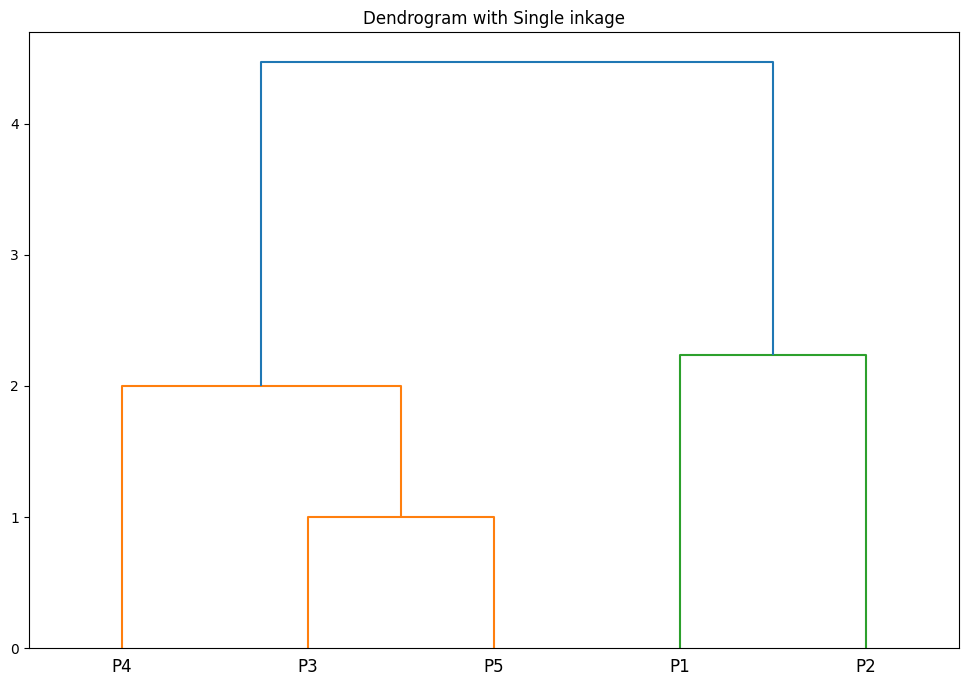

In [6]:
plt.figure(figsize=(12,8)) 
plt.title("Dendrogram with Single inkage")  
dend = shc.dendrogram(shc.linkage(data[['a', 'b']], method='single'), labels=data.index)